In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import time

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import *

#### LOAD DATASET

In [2]:
cal_housing = fetch_california_housing()
x, y = cal_housing.data, cal_housing.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [3]:
df = pd.DataFrame(data=x, columns=cal_housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


#### NORMALIZE DATASET

In [4]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### LINEAR REGRESSION:

In [11]:
from sklearn.linear_model import LinearRegression

R2 Score:  59.58 %
MSE:  0.53
Training Time:  0.0135 s


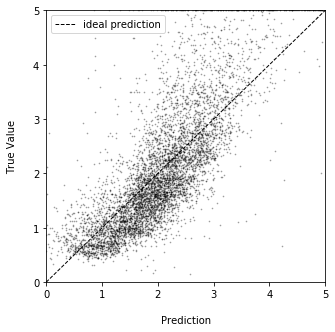

In [23]:
regr=LinearRegression()
start = time.time()
regr.fit(x_train, y_train)
end = time.time()

y_pred = regr.predict(x_test)
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score: ", np.round(100*score,2), "%")
print("MSE: ", np.round(mse,2))
print("Training Time: ", np.round(end-start,4), "s")

plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test, s=0.5, c="black", alpha=0.3)
plt.plot([0, 10], [0, 10], 'k--', lw=1, color="black", label='ideal prediction')
plt.legend()
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel("\nPrediction")
plt.ylabel("True Value\n")
plt.show()

results=[]
regr_results = [score, mse, end-start]
results.append(regr_results)

#### KNN REGRSSOR

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    "n_neighbors":[3,5,10,20],
    "weights":["uniform", "distance"],
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"]
}

regr = GridSearchCV(estimator=KNeighborsRegressor(), cv=5, param_grid=param_grid, n_jobs=-1, verbose=0)
grid_result = regr.fit(x_train, y_train)

# summary
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.688740 using {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
0.653152 (0.010286) with {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
0.655631 (0.010113) with {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
0.675070 (0.004605) with {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
0.678910 (0.005099) with {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
0.683453 (0.003100) with {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}
0.688740 (0.002790) with {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
0.679543 (0.005072) with {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}
0.685889 (0.004347) with {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}
0.653152 (0.010286) with {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
0.655631 (0.010113) with {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
0.675070 (0.004605) with {

R2 Score:  68.98 %
MSE:  0.41
Training Time:  0.059 s


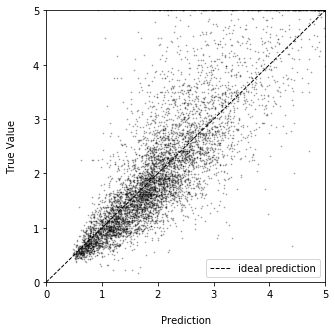

[[0.5957702326061665, 0.5305677824766752, 0.013515233993530273],
 [0.6897544039584136, 0.4072097880772001, 0.059000492095947266]]

In [24]:
regr = KNeighborsRegressor(n_neighbors=10, algorithm="auto", weights="distance")
start = time.time()
regr.fit(x_train, y_train)
end = time.time()

y_pred = regr.predict(x_test)
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score: ", np.round(100*score,2), "%")
print("MSE: ", np.round(mse,2))
print("Training Time: ", np.round(end-start,4), "s")

plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test, s=0.5, c="black", alpha=0.3)
plt.plot([0, 10], [0, 10], 'k--', lw=1, color="black", label='ideal prediction')
plt.legend()
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel("\nPrediction")
plt.ylabel("True Value\n")
plt.show()

regr_results = [score, mse, end-start]
results.append(regr_results)

#### RANDOM FOREST REGRESSOR

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
param_grid = {
    "n_estimators":[50,100,250],
    "max_depth":[3,5,10],
    "min_samples_split":[1,2,5],
    "max_features":[0.3, 0.5, 0.7]
}

regr = GridSearchCV(estimator=RandomForestRegressor(), cv=5, param_grid=param_grid, n_jobs=-1, verbose=0)
grid_result = regr.fit(x_train, y_train)

# summary
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.783104 using {'max_depth': 10, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 250}
nan (nan) with {'max_depth': 3, 'max_features': 0.3, 'min_samples_split': 1, 'n_estimators': 50}
nan (nan) with {'max_depth': 3, 'max_features': 0.3, 'min_samples_split': 1, 'n_estimators': 100}
nan (nan) with {'max_depth': 3, 'max_features': 0.3, 'min_samples_split': 1, 'n_estimators': 250}
0.469702 (0.008155) with {'max_depth': 3, 'max_features': 0.3, 'min_samples_split': 2, 'n_estimators': 50}
0.479860 (0.010906) with {'max_depth': 3, 'max_features': 0.3, 'min_samples_split': 2, 'n_estimators': 100}
0.482826 (0.003726) with {'max_depth': 3, 'max_features': 0.3, 'min_samples_split': 2, 'n_estimators': 250}
0.478646 (0.013393) with {'max_depth': 3, 'max_features': 0.3, 'min_samples_split': 5, 'n_estimators': 50}
0.482206 (0.007101) with {'max_depth': 3, 'max_features': 0.3, 'min_samples_split': 5, 'n_estimators': 100}
0.480316 (0.005739) with {'max_depth': 3, 'max_features': 0.3, '

R2 Score:  81.31 %
MSE:  0.25
Training Time:  21.4511 s


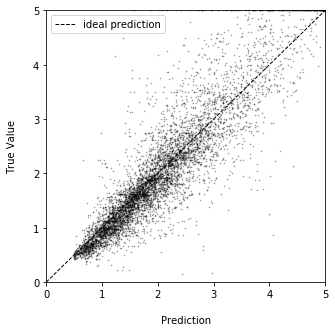

In [25]:
regr = RandomForestRegressor(n_estimators=250, max_depth=20, min_samples_split=2, max_features=0.5)
start = time.time()
regr.fit(x_train, y_train)
end = time.time()

y_pred = regr.predict(x_test)
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score: ", np.round(100*score,2), "%")
print("MSE: ", np.round(mse,2))
print("Training Time: ", np.round(end-start,4), "s")

plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test, s=0.5, c="black", alpha=0.3)
plt.plot([0, 10], [0, 10], 'k--', lw=1, color="black", label='ideal prediction')
plt.legend()
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel("\nPrediction")
plt.ylabel("True Value\n")
plt.show()

regr_results = [score, mse, end-start]
results.append(regr_results)

#### GRADIENT BOOSTING REGRESSOR

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
param_grid = {
    "n_estimators":[50,100,250],
    "learning_rate":[0.01, 0.1, 0.2],
    "max_depth":[5,10,20],
    "min_samples_split":[1,2,5],
    "max_features":[0.3, 0.5, 0.7]
}

regr = GridSearchCV(estimator=GradientBoostingRegressor(), cv=5, param_grid=param_grid, n_jobs=-1, verbose=0)
grid_result = regr.fit(x_train, y_train)

# summary
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

R2 Score:  83.87 %
MSE:  0.21
Training Time:  10.6198 s


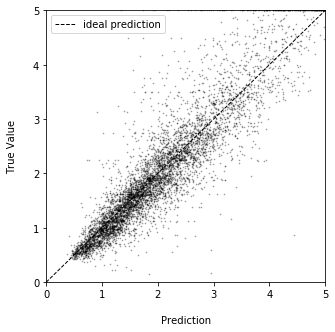

In [26]:
regr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.1, max_depth=10, min_samples_split=2, max_features=0.3)
start = time.time()
regr.fit(x_train, y_train)
end = time.time()

y_pred = regr.predict(x_test)
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score: ", np.round(100*score,2), "%")
print("MSE: ", np.round(mse,2))
print("Training Time: ", np.round(end-start,4), "s")

plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test, s=0.5, c="black", alpha=0.3)
plt.plot([0, 10], [0, 10], 'k--', lw=1, color="black", label='ideal prediction')
plt.legend()
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel("\nPrediction")
plt.ylabel("True Value\n")
plt.show()

regr_results = [score, mse, end-start]
results.append(regr_results)

#### SVM REGRESSOR:

In [5]:
from sklearn.svm import SVR

In [6]:
param_grid = {
    "kernel":["linear", "rbf", "sigmoid"]
}

regr = GridSearchCV(estimator=SVR(), cv=5, param_grid=param_grid, n_jobs=-1, verbose=0)
grid_result = regr.fit(x_train, y_train)

# summary
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

{'kernel': 'rbf'}

R2 Score:  73.37 %
MSE:  0.35
Training Time:  13.013 s


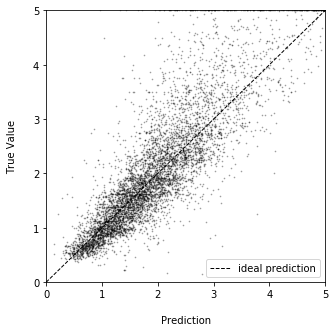

In [27]:
regr = SVR(kernel="rbf")
start = time.time()
regr.fit(x_train, y_train)
end = time.time()

y_pred = regr.predict(x_test)
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score: ", np.round(100*score,2), "%")
print("MSE: ", np.round(mse,2))
print("Training Time: ", np.round(end-start,4), "s")

plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test, s=0.5, c="black", alpha=0.3)
plt.plot([0, 10], [0, 10], 'k--', lw=1, color="black", label='ideal prediction')
plt.legend()
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel("\nPrediction")
plt.ylabel("True Value\n")
plt.show()

regr_results = [score, mse, end-start]
results.append(regr_results)

#### BEST MODEL:

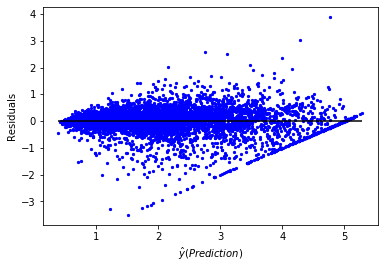

In [10]:
regr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.1, max_depth=10, min_samples_split=2, max_features=0.3)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

min_val = min(y_pred)
max_val = max(y_pred)

plt.scatter(y_pred, y_pred - y_test, color="blue", s=5)
plt.hlines(y = 0, xmin =min_val, xmax=max_val)
plt.xlabel("$\hat{y} (Prediction)$")
plt.ylabel("Residuals")
plt.show()

#### COMPARISON OF MODELS

In [34]:
result_df = pd.DataFrame(data=results, columns=["r2", "mse", "training_time"])
result_df.index=["Linear Regression", "KNN", "Random Forest", "Gradient Boosting", "SVM"]
result_df

,r2,mse,training_time
Linear Regression,0.595770,0.530568,0.013515
KNN,0.689754,0.407210,0.059000
Random Forest,0.813102,0.245311,21.451062
Gradient Boosting,0.838656,0.211771,10.619786
SVM,0.733683,0.349552,13.012978


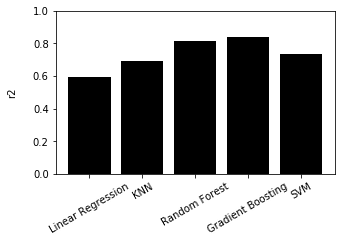

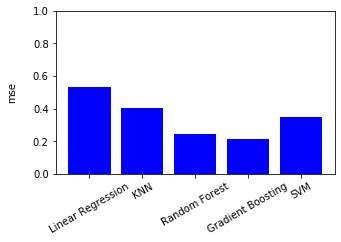

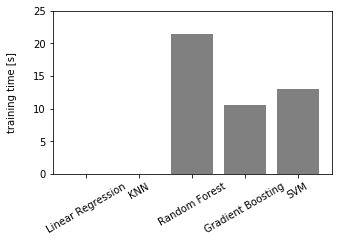

In [65]:
plt.figure(figsize=(5,3))
plt.bar(result_df.index, result_df.r2, color="black")
plt.ylabel("r2\n")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(5,3))
plt.bar(result_df.index, result_df.mse, color="blue")
plt.ylabel("mse\n")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(5,3))
plt.bar(result_df.index, result_df.training_time, color="grey")
plt.ylabel("training time [s]\n")
plt.xticks(rotation=30)
plt.ylim(0,25)
plt.show()